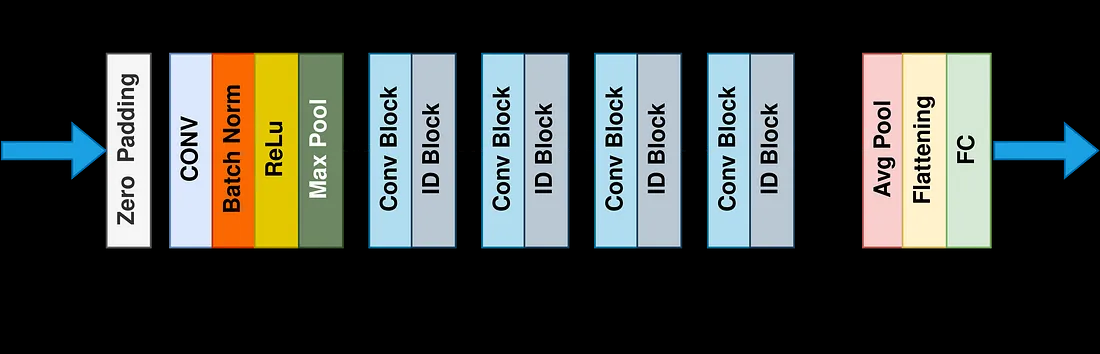

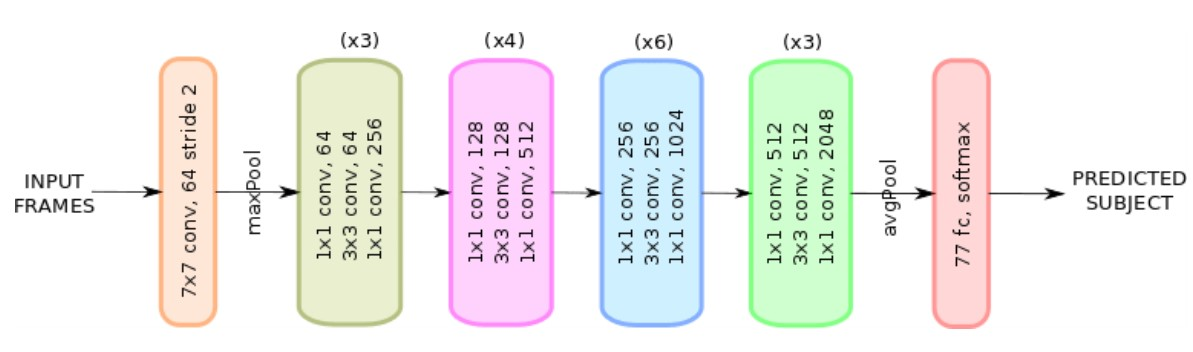

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from keras.utils import plot_model
from keras.initializers import glorot_uniform
from keras.layers import Dense, Add, Input, Dropout, MaxPooling2D, Conv2D, AveragePooling2D, Flatten, Activation, BatchNormalization,ZeroPadding2D
from tensorflow.keras.optimizers import Adam

In [28]:
def convolutional_block(X, filters, s = 2):
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X

    # First layer 
    X = Conv2D(F1, (1, 1), strides = (s,s))(X) # 1,1 is filter size
    X = BatchNormalization(axis = 3)(X)  # normalization on channels
    X = Activation('relu')(X)

      
    # Second layer  
    X = Conv2D(filters = F2, kernel_size = (3, 3), strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)


    # Third layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)


    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3)(X_shortcut)

    # Final step: Add shortcut value here, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [29]:
def identity_block(X, filters):

    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Saving the input value.we need this later to add to the output. 
    X_shortcut = X
    
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters = F2, kernel_size = (3, 3), strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X



In [30]:
# def ResNet50(input_shape=(224, 224, 3), classes = 1000):
def ResNet50(input_shape=(224, 224, 3), classes = 10):


  X_input = Input(input_shape)

  X = ZeroPadding2D((3, 3))(X_input) #3,3 padding

  X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(X) 
  X = BatchNormalization(axis=3, name='bn_conv1')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((3, 3), strides=(2, 2))(X)

  ## 1st 3_layers
  X = convolutional_block(X, filters=[64, 64, 256], s = 1)
  X = identity_block(X,  filters = [64, 64, 256])
  X = identity_block(X,  filters = [64, 64, 256])

  ## 2nd 4_layers
  X = convolutional_block(X,  filters = [128, 128, 512], s = 2)
  X = identity_block(X, [128, 128, 512])
  X = identity_block(X, [128, 128, 512])
  X = identity_block(X, [128, 128, 512])

  
  ## 3rd 6_layers
  X = convolutional_block(X, filters = [256, 256, 1024], s = 2)
  X = identity_block(X, [256, 256, 1024])
  X = identity_block(X, [256, 256, 1024])
  X = identity_block(X, [256, 256, 1024])
  X = identity_block(X, [256, 256, 1024])
  X = identity_block(X, [256, 256, 1024])

  ## 1st 3_layers
  X = convolutional_block(X, filters=[512, 512, 2048], s = 2)
  X = identity_block(X, filters = [512, 512, 2048])
  X = identity_block(X, filters = [512, 512, 2048])

  # AVGPOOL 
  X = AveragePooling2D((2,2))(X)


  # output layer
  X = Flatten()(X)
  X = Dense(classes, activation='softmax',  kernel_initializer = glorot_uniform(seed=0))(X)
    
    
  # Create model
  model = Model(inputs = X_input, outputs = X, name='ResNet50')

  return model

In [31]:
model = ResNet50(input_shape = (224, 224, 3), classes = 10)

In [32]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d_1[0][0]']       
                                )                                                          

In [33]:
plot_model(model, show_shapes = True, show_layer_names = True, show_layer_activations = True)

Output hidden; open in https://colab.research.google.com to view.

In [34]:
import tensorflow as tf
print(tf.test.gpu_device_name())


/device:GPU:0


In [35]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [36]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [37]:

x_train.shape

(50000, 32, 32, 3)

In [38]:
y_train.shape

(50000, 1)

In [39]:
x_train[0].shape

(32, 32, 3)

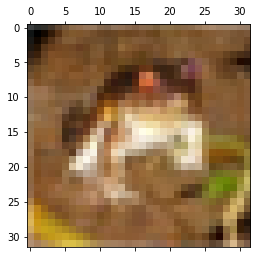

In [40]:
plt.matshow(x_train[0])

In [41]:
#Normalizing data by divide by 255
x_train = x_train/255
x_test = x_test/255

In [42]:
x_train =x_train[:8000]
x_test =x_test[:2000]
print(x_train.shape)
print(x_test.shape)

(8000, 32, 32, 3)
(2000, 32, 32, 3)


In [43]:
from tensorflow.keras.utils import to_categorical

In [44]:
# y_train_categorical = keras.utils.to_categorical(
#      y_train[:8000], num_classes = 10
# )
# y_test_categorical = keras.utils.to_categorical(
#      y_test[:2000], num_classes = 10
# )

y_train_categorical = to_categorical(y_train[:8000], num_classes=10)
y_test_categorical = to_categorical(y_test[:2000], num_classes=10)

print(y_train_categorical.shape)
print(y_test_categorical.shape)

(8000, 10)
(2000, 10)


# * With **`preserve_aspect_ratio=True`**, the aspect ratio is preserved, so size is the maximum for each dimension

In [45]:
x_train = tf.image.resize(x_train, [224, 224], preserve_aspect_ratio=True)
x_test = tf.image.resize(x_test, [224,224], preserve_aspect_ratio=True)

print(x_train.shape)
print(x_test.shape)

(8000, 224, 224, 3)
(2000, 224, 224, 3)


In [46]:
# model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
#                     loss='categorical_crossentropy',
#                     metrics=['accuracy'])

In [47]:
# model.fit(x_train, 
#           y_train_categorical,
#           epochs=5,
#           batch_size=32,
#           verbose = 1,
#           validation_data= (x_test, y_test_categorical))

In [48]:
# model.evaluate(x_test, y_test_categorical)

In [49]:
# model.history.history

In [50]:
# import pandas as pd
# df = pd.DataFrame(model.history.history)

In [51]:
# df.head()

In [52]:
# df[['loss', 'val_loss']].plot()

In [53]:
# df[['accuracy', 'val_accuracy']].plot()

In [58]:
# Load the ResNet-50 model with pre-trained random weights
base_model = tf.keras.applications.resnet50.ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))

# Add a global average pooling layer and a dense output layer with softmax activation
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(10, activation='softmax')(x)

# Create a new model with the ResNet-50 base and the new output layers
model = Model(inputs=base_model.input, outputs=x)

# Compile the model with categorical cross-entropy loss and Adam optimizer with learning_rate = 0.001
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), metrics=['accuracy'])

# Train the model on the CIFAR-10 dataset
model.fit(x_train, y_train, epochs=5, batch_size = 32, verbose = 1, validation_data=(x_test, y_test))

In [62]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d_1[0][0]']       
                                )                                                          

In [63]:
model.compile(optimizer= Adam(0.001), 
                     loss= 'categorical_crossentropy',
                     metrics= ['accuracy'])

In [64]:
model.fit(x_train, 
                 y_train_categorical,
                 batch_size= 32,
                 epochs=5,
                 validation_data= (x_test, y_test_categorical))

Epoch 1/5
250/250 [==============================] - 129s 340ms/step - loss: 2.8802 - accuracy: 0.2525 - val_loss: 2.8468 - val_accuracy: 0.1700
Epoch 2/5
250/250 [==============================] - 88s 353ms/step - loss: 1.6868 - accuracy: 0.3919 - val_loss: 1.6281 - val_accuracy: 0.4180
Epoch 3/5
250/250 [==============================] - 85s 338ms/step - loss: 1.5123 - accuracy: 0.4487 - val_loss: 1.5183 - val_accuracy: 0.4445
Epoch 4/5
250/250 [==============================] - 89s 356ms/step - loss: 1.3769 - accuracy: 0.4974 - val_loss: 1.6463 - val_accuracy: 0.4765
Epoch 5/5
250/250 [==============================] - 89s 357ms/step - loss: 1.3337 - accuracy: 0.5255 - val_loss: 1.4865 - val_accuracy: 0.4815


In [65]:
import pandas as pd
df = pd.DataFrame(model.history.history)

In [66]:
df.head()

,loss,accuracy,val_loss,val_accuracy
0,2.880239,0.252500,2.846823,0.1700
1,1.686758,0.391875,1.628143,0.4180
2,1.512294,0.448750,1.518291,0.4445
3,1.376858,0.497375,1.646334,0.4765
4,1.333710,0.525500,1.486469,0.4815


<AxesSubplot:>

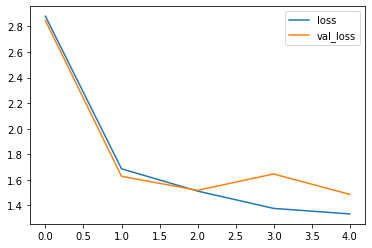

In [67]:
df[['loss', 'val_loss']].plot()

<AxesSubplot:>

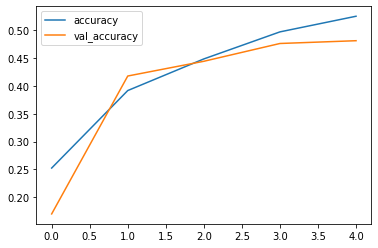

In [69]:
df[['accuracy', 'val_accuracy']].plot()